The ntoebook will be very similar to the rates_analysis notebook but will be related to just COWD + companions regardless of if the companion is a white dwarf or not

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')

In [2]:
import sys
import os

# Add the subdir to sys.path
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 

In [3]:
# reading in the HDF5 file
pathTorates_NS = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_NSNS_AIS/CosmicIntegration/Rate_info.h5' #path of the hdf5 file

Data_rates_NS = h5.File(pathTorates_NS)

In [4]:
list(Data_rates_NS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'].keys())
rates_info_NS = Data_rates_NS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [5]:
rates_info_NS.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [6]:
dco_mask_NS = rates_info_NS['DCOmask'][()]

In [7]:
# reading in the HDF5 file
pathToweights_NS = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_NSNS_AIS/MainRun/COMPAS_Output_wWeights.h5' #path of the hdf5 file

Data_weights_NS = h5.File(pathToweights_NS)

In [8]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_NS_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights_NS["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_NS_data[key] = Data_weights_NS["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

#### Doing rates analysis on the AIS WD hdf5 output

In [9]:
# reading in the HDF5 file
pathTorates_H5 = '/home/jovyan/home/rate_outputs/Rate_info_all_1.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [10]:
Data_rates.keys()

<KeysViewHDF5 ['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']>

In [11]:
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [12]:
# reading in the HDF5 file
pathToweights_H5 = '/home/jovyan/home/edit_hdf5/WDWD/v02.46.01/COMPAS_Output_wWeights_COWD.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [13]:
Data_weights.keys()

<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_Pulsar_Evolution', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048', 'Run_Details']>

In [14]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [ ]:
DCO_data

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
0,0,2.328412e+13,1.110223e-16,0,"b""b'4 '""","b""b'NA '""",31.911977,27.289501,0,0.000473,0,1,0.0,0.0,158,43.919694,14,14,4.347694,10.000000
1,0,3.974767e+19,5.431362e-02,0,"b""b'NA '""","b""b'NA '""",5.843895,5.255385,0,0.000179,0,1,0.0,0.0,326,453.863126,14,14,16.329921,10.000000
2,1,6.281330e+02,5.821410e-01,0,"b""b'2 '""","b""b'4-8 '""",9.648989,1.454633,1,0.001588,0,1,0.0,0.0,695,0.033701,14,13,14.260153,10.000000
3,1,5.402979e+03,9.111420e-01,0,"b""b'4 '""","b""b'5-8 '""",3.382412,1.470501,1,0.000260,0,1,0.0,0.0,858,0.114685,14,13,19.579543,10.000000
4,0,8.206604e+18,6.933256e-01,0,"b""b'NA '""","b""b'NA '""",10.933214,2.614135,0,0.001677,0,1,0.0,0.0,948,557.934571,14,14,31.652154,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21684,2,2.834655e+03,0.000000e+00,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,0,1,NaN,NaN,999761,1.610884,11,11,940.615944,0.254697
21685,1,6.537726e-03,0.000000e+00,1,"b""b'2-8 '""","b""b'3 '""",0.783044,1.002699,1,0.001370,0,1,NaN,NaN,999848,0.088370,11,7,118.537793,0.305238
21686,2,1.073100e+03,0.000000e+00,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,0,1,NaN,NaN,999871,1.558990,11,11,1787.995323,0.212650
21687,1,3.009383e+03,0.000000e+00,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,0,1,NaN,NaN,999912,1.954841,11,11,382.472452,0.160558


In [ ]:
dco_mask = rates_info['DCOmask'][()]
DCO_data_masked = DCO_data[dco_mask]
DCO_data_masked

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
2,1,628.133038,5.821410e-01,0,"b""b'2 '""","b""b'4-8 '""",9.648989,1.454633,1,0.001588,0,1,0.0,0.0,695,0.033701,14,13,14.260153,10.000000
3,1,5402.979047,9.111420e-01,0,"b""b'4 '""","b""b'5-8 '""",3.382412,1.470501,1,0.000260,0,1,0.0,0.0,858,0.114685,14,13,19.579543,10.000000
13,1,152.201286,1.241267e-16,0,"b""b'4 '""","b""b'4 '""",14.388043,13.037963,1,0.000496,0,1,0.0,0.0,2629,0.039470,14,14,7.283955,10.000000
14,1,140.602815,4.475452e-16,0,"b""b'NA '""","b""b'4 '""",22.566004,13.764098,1,0.000174,0,1,0.0,0.0,2674,0.047091,14,14,6.374143,10.000000
25,1,254.671690,1.110223e-16,0,"b""b'NA '""","b""b'4 '""",18.768145,9.959553,1,0.000166,0,1,0.0,0.0,4947,0.045374,14,14,8.191656,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21684,2,2834.654788,0.000000e+00,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,0,1,NaN,NaN,999761,1.610884,11,11,940.615944,0.254697
21685,1,0.006538,0.000000e+00,1,"b""b'2-8 '""","b""b'3 '""",0.783044,1.002699,1,0.001370,0,1,NaN,NaN,999848,0.088370,11,7,118.537793,0.305238
21686,2,1073.100464,0.000000e+00,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,0,1,NaN,NaN,999871,1.558990,11,11,1787.995323,0.212650
21687,1,3009.383390,0.000000e+00,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,0,1,NaN,NaN,999912,1.954841,11,11,382.472452,0.160558


In [17]:
left_over_seeds = np.array(DCO_data['SEED']-DCO_data_masked['SEED'])
left_over_index = np.where(left_over_seeds==0)[0]
left_over_index
# DCO_data.iloc[[left_over_index]]
# DCO_data.iloc[DCO_data['SEED']==left_over_seeds]

array([    2,     3,    13, ..., 21686, 21687, 21688], shape=(19612,))

In [18]:
rates = rates_info['merger_rate']

for i in range(rates_info['merger_rate'][0,:].shape[0]):

    DCO_data_masked['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]

/tmp/ipykernel_84945/2875622755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DCO_data_masked['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_84945/2875622755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DCO_data_masked['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_84945/2875622755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [19]:
# let's select just for the COWD
cowd_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Stellar_Type(2)']==11)
DCO_COWD_data = DCO_data_masked[cowd_bool]

In [20]:
DCO_COWD_data

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
463,1,64.106710,0.0,0,"b""b'8 '""","b""b'3 '""",0.483516,0.394784,1,0.000438,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
464,2,0.008269,0.0,1,"b""b'5 '""","b""b'3 '""",0.629323,0.227306,1,0.000261,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
465,2,0.049491,0.0,0,"b""b'5 '""","b""b'3 '""",0.568929,0.211294,1,0.002140,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
466,1,8321.641517,0.0,0,"b""b'3 '""","b""b'5 '""",0.320580,0.526926,1,0.002418,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
467,1,441.783850,0.0,0,"b""b'1-2 '""","b""b'5-8 '""",0.276373,0.679873,1,0.012405,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21684,2,2834.654788,0.0,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
21685,1,0.006538,0.0,1,"b""b'2-8 '""","b""b'3 '""",0.783044,1.002699,1,0.001370,...,0.197846,0.185715,0.174223,0.163265,0.15298,0.143327,0.134203,0.125589,0.117465,0.109805
21686,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
21687,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
# # what are the stellar types in this system
# print(np.unique(DCO_COWD_data['Stellar_Type(1)']))
# print(np.unique(DCO_COWD_data['Stellar_Type(2)']))

Let's make a dataframe that just selects for at least one COWD that is more thatn 0.6 solar masses

In [22]:
# let's select just for the COWD with mass greater than 0.6 solar masses 
# cowd_small_bool = np.logical_or((np.logical_and(DCO_data['Stellar_Type(1)']==11,DCO_data['Mass(1)']>0.6)),(np.logical_and(DCO_data['Stellar_Type(2)']==11,DCO_data['Mass(2)']>0.6)))
# DCO_COWD_SMALL = DCO_data_masked[cowd_small_bool]
# DCO_COWD_SMALL

Let's make a dataframe that just selects for at leadt one COWD that is more thatn 0.9 solar masses

In [23]:
# let's select just for the COWD with mass greater than 0.9 solar masses 
cowd_sn_bool = np.logical_or(np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']>0.9),np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Mass(2)']>0.9))
DCO_COWD_SN = DCO_data_masked[cowd_sn_bool]
DCO_COWD_SN

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
486,1,0.012639,0.0,1,"b""b'1-2-8 '""","b""b'4 '""",1.265091,6.411682,1,0.002127,...,5.957695,5.758925,5.571568,5.386489,5.19902,5.024496,4.850949,4.680289,4.514279,4.354267
493,1,1078.118621,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.097638,0.710329,1,0.000465,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
508,1,7817.949768,0.0,0,"b""b'2 '""","b""b'5-8 '""",0.480298,1.129562,1,0.000316,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
518,1,1918.564903,0.0,0,"b""b'2-8 '""","b""b'4 '""",0.943178,0.673086,1,0.000232,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
523,2,5345.530020,0.0,0,"b""b'5 '""","b""b'5-8 '""",1.104234,0.679025,1,0.000981,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21677,1,623.438167,0.0,0,"b""b'2-8 '""","b""b'3-8 '""",1.102845,0.650778,1,0.000612,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
21678,1,4076.846983,0.0,0,"b""b'2-8 '""","b""b'3 '""",1.250117,0.703484,1,0.024066,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
21680,1,1056.787184,0.0,0,"b""b'2-8 '""","b""b'3-8 '""",1.042414,0.610693,1,0.006919,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
21683,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


Let's also select for WD+NS systems

In [24]:
# let's select just for the COWD with mass greater than 0.9 solar masses 
wd_ns_bool = np.logical_or((np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Stellar_Type(2)']==14)),(np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Stellar_Type(2)']==14)))
DCO_WD_NS = DCO_data_masked[wd_ns_bool]
DCO_WD_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79


Let's do this again for NSNS

In [25]:
merging_all_NS = DCO_NS_data[dco_mask_NS]
merging_all_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
323,1,4.914255,0.144223,0,b'2 ',b'4-8 ',1.210342,1.442315,1,0.000686,...,7235,0.002952,13,13,38.082441,0.000099,-1.448854,0.0,0.0,0.024294
1336,1,110.465241,0.730318,0,b'2 ',b'4-8 ',1.260087,1.424028,1,0.000537,...,29725,0.012377,13,13,39.974896,0.000087,-1.417040,0.0,0.0,0.028337
1759,1,3594.070404,0.356025,0,b'5 ',b'8 ',1.480496,1.171439,1,0.025743,...,39167,0.016939,13,13,24.544319,0.000072,-1.093873,0.0,0.0,0.011341
1915,1,15.038578,0.292517,0,b'4-8 ',b'8 ',1.188053,1.203831,1,0.001179,...,42602,0.003843,13,13,38.306424,0.000179,-1.376143,0.0,0.0,0.025722
1955,1,6.854551,0.692189,0,b'2 ',b'4-8 ',1.260033,1.195963,1,0.013255,...,43466,0.005260,13,13,36.808308,0.000033,-1.205352,0.0,0.0,0.023426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46667,1,2.035270,0.304401,0,b'2 ',b'4-8 ',1.242316,1.573235,1,0.002852,...,999727,0.002643,13,13,35.825917,0.000153,-1.611445,0.0,0.0,0.013998
46668,1,0.978486,0.008180,0,b'2 ',b'4-8 ',1.260145,1.554736,1,0.000184,...,999770,0.002022,13,13,36.031843,0.000145,-1.593994,0.0,0.0,0.025480
46671,1,2.060512,0.283681,0,b'2 ',b'4-8 ',1.260112,1.308423,1,0.000471,...,999894,0.002454,13,13,40.501417,0.000112,-1.432607,0.0,0.0,0.007313
46672,1,0.808230,0.271005,0,b'2 ',b'4-8 ',1.260144,1.752863,1,0.000146,...,999931,0.002160,13,13,36.358539,0.000144,-1.707163,0.0,0.0,0.017477


In [26]:
merging_all_NS[merging_all_NS['Merges_Hubble_Time']==0]

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight


In [27]:
# for BNS
rates_NS = rates_info_NS['merger_rate']

for i in range(rates_info_NS['merger_rate'][0,:].shape[0]):

    merging_all_NS['merger_rate_z'+str(i)] = rates_info_NS['merger_rate'][:,i]

/tmp/ipykernel_84945/453081479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_NS['merger_rate_z'+str(i)] = rates_info_NS['merger_rate'][:,i]
/tmp/ipykernel_84945/453081479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_NS['merger_rate_z'+str(i)] = rates_info_NS['merger_rate'][:,i]
/tmp/ipykernel_84945/453081479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Getting the total merger rate for a specific redshift

In [28]:
# gettign the mean merger rate per system
total_merger_rate_COWD = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate = np.sum(DCO_COWD_data[DCO_COWD_data.columns[20+s]])
    total_merger_rate_COWD.append(tota_rate)

In [29]:
# gettign the mean merger rate per system
total_merger_rate_WD_SN = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate = np.sum(DCO_COWD_SN[DCO_COWD_SN.columns[20+s]])
    total_merger_rate_WD_SN.append(tota_rate)

In [30]:
print(total_merger_rate_WD_SN)

[np.float64(4812.741906621274), np.float64(5254.247689017786), np.float64(5708.171788548159), np.float64(6047.183596672757), np.float64(6439.061328605637), np.float64(6836.263968646783), np.float64(7206.5440075908255), np.float64(7561.440769053962), np.float64(7901.982615439749), np.float64(8238.871178803813), np.float64(8560.9195456825), np.float64(8835.531512124064), np.float64(9048.196292833525), np.float64(9208.29124181634), np.float64(9325.527591086764), np.float64(9404.029883857134), np.float64(9442.77943418341), np.float64(9444.605793538616), np.float64(9405.98309647684), np.float64(9331.605139499581), np.float64(9226.439879499516), np.float64(9092.802648419161), np.float64(8929.880569352867), np.float64(8736.032605307359), np.float64(8512.970634888794), np.float64(8264.582155655673), np.float64(7994.027138125879), np.float64(7702.526082140618), np.float64(7395.125823971413), np.float64(7076.856355985388), np.float64(6748.848422725407), np.float64(6418.207228007783), np.float64(

In [31]:
# BNS
# gettign the mean merger rate per system
total_merger_rate_NS = []

# looping through each collection of merger rates
for s in range(rates_info_NS['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_NS = np.sum(merging_all_NS[merging_all_NS.columns[20+s]])
    total_merger_rate_NS.append(tota_rate_NS)

In [32]:
# the merger rate for COWD of at least 0.9 solar masses
cowd_sn_rate_general = np.sum(rates_info['merger_rate'][cowd_sn_bool],axis=0)
# print(cowd_sn_rate_general)

In [33]:
# let's compute the merger rate for all of the cases
# total_merger_rate_COWD = np.sum(rates_info['merger_rate'][cowd_bool],axis=0)
# total_merger_rate_WD_MASSIVE = np.sum(rates_info['merger_rate'][cowd_sn_bool],axis=0)
# total_merger_rate_WD_SMALL = np.sum(rates_info['merger_rate'][cowd_small_bool],axis=0)
# total_merger_rate_NS = np.sum(rates_info['merger_rate'][dco_mask_NS],axis=0)


In [34]:
# extracting the redshifts and rates from Briel et al
# units in the appendix should be in h^-3 y^-1 Gpc^-3 so we must convert below to get yr^-1 Gpc^-3
h_little = 0.6766

redshifts_briel = [
    0, 0.01, 0.03, (0.025+0.050)/2, 0.073, (0.05+0.15)/2, (0.075+0.125)/2, 0.11, 0.11, 0.13, 
    0.15, (0.125+0.175)/2, 0.16, (0.175+0.225)/2, 0.2, 0.25, (0.15+0.35)/2, (0.225+0.275)/2, 
    0.26, 0.3, (0.275+0.325)/2, 0.35, 0.35, 0.42, 0.44, 0.45, 0.45, (0.35+0.55)/2, 0.46, 0.47, 
    0.47, 0.55, 0.55, 0.55, 0.62, 0.65, (0.55+0.75)/2, 0.65, 0.74, 0.75, 0.75, 0.75, 0.8, 0.83, 0.85, 
    0.85, 0.94, 0.95, 0.95, 1.05, 1.1, 1.14, 1.21, 1.23, 1.25, 1.59, 1.61, 1.69, 1.75, 2.25
]

rates_briel = [
    0.77, 0.82, 0.82, 0.81, 0.71, 1.60, 0.76, 1.08, 0.72, 0.58, 0.93, 0.90, 0.41, 1.01, 0.58,
    1.05, 1.14, 1.06, 0.82, 0.99, 1.27, 0.99, 1.05, 1.34, 0.76, 0.90, 1.05, 1.52, 1.40, 1.22, 
    2.33, 0.93, 1.40, 1.52, 3.76, 1.40, 2.01, 1.43, 2.30, 1.49, 1.98, 1.69, 2.45, 3.79, 2.27, 
    1.66, 1.31, 2.22, 2.24, 2.30, 2.16, 2.06, 3.85, 2.45, 1.87, 1.31, 1.22, 2.97, 2.10, 1.43
]

# converting the rates to the correct units
rates_briel = np.array(rates_briel)
converted_rates_briel = (rates_briel*(10**5))*(h_little**3)

## uncertainties
lower_limits = [
    -0.10, -0.26, -0.32, -0.24, -0.08, -0.85, -0.13, -0.29, -0.20, -0.18, -0.67, -0.10, -0.26, -0.09, 
    -0.23, -0.76, -0.35, -0.08, -0.20, -0.44, -0.10, -0.55, -0.17, -0.93, -0.39, -0.44, -0.17, -0.38, 
    -0.50, -0.17, -0.79, -0.41, -0.17, -0.26, -1.66, -0.15, -0.52, -0.50, -1.20, -0.55, -0.61, -0.17, 
    -0.54, -0.79, -0.64, -0.15, -0.55, -0.73, -0.23, -0.82, -0.35, -0.53, -0.85, -0.82, -0.64, -0.64, 
    -0.67, -1.08, -0.87, -1.11
]

lower_limits = np.array(lower_limits)
converted_lower_limits = (lower_limits*(10**5)*(h_little**3))

upper_limits = [
    0.10, 0.26, 0.32, 0.33, 0.08, 1.46, 0.15, 0.29, 0.08, 0.20, 0.67, 0.11, 0.26, 0.09, 0.23,
    1.75, 0.38, 0.09, 0.20, 0.47, 0.11, 0.55, 0.17, 1.22, 0.67, 0.44, 0.17, 0.32, 0.50, 0.17, 
    1.08, 0.41, 0.17, 0.29, 2.57, 0.15, 0.55, 0.50, 0.96, 0.79, 0.61, 0.17, 0.67, 0.96, 0.64, 
    0.15, 0.64, 0.73, 0.23, 0.82, 0.35, 0.70, 1.05, 0.73, 0.90, 0.99, 1.14, 1.57, 1.31, 2.77
]

upper_limits = np.array(upper_limits)
converted_upper_limits = (upper_limits*(10**5)*(h_little**3))

# multiplied the lower errors by -1 so make them positive to avoid the plt.errorbar error 
y_error = [-1*(converted_lower_limits), converted_upper_limits]
# y_error = [converted_rates_briel+ converted_lower_limits, converted_rates_briel + converted_upper_limits]
# converted_y_error = y_error*(10**5)*(0.6766)

# error_bars = y_error


(1000, 1000000)

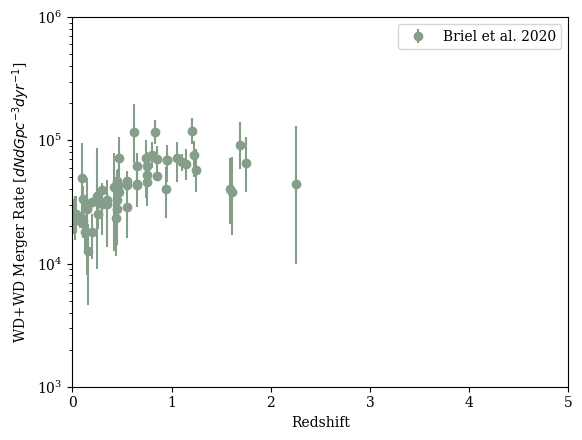

In [35]:
# testing to make sure the Briel et al. rates look good

## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = '#849E8A',label='Briel et al. 2020')

plt.yscale('log')
plt.ylabel(r"WD+WD Merger Rate [$dNdGpc^{-3}dyr^{-1}$]")
plt.xlabel(r"Redshift")
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()
plt.xlim(0,5)
plt.ylim(10**3,10**6)

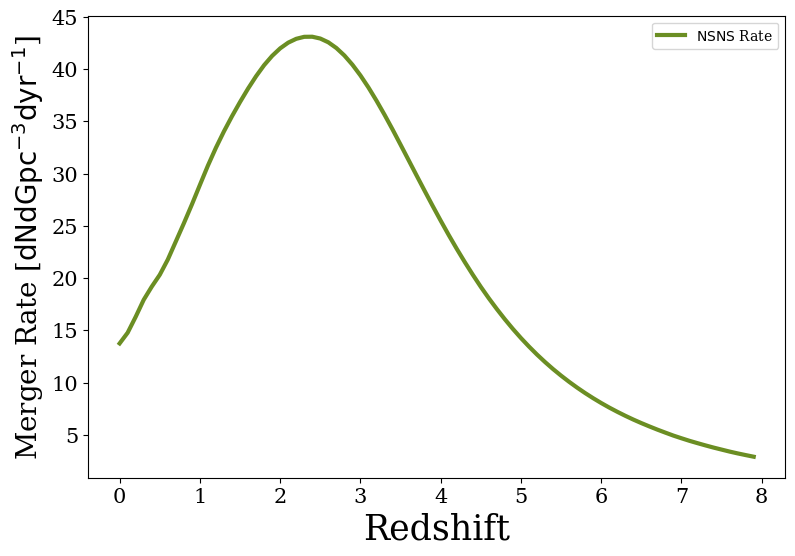

In [36]:
# looking at the NSNS rate over redshift
# let's lest plot the different COMPAS version of the rates vs. redshifts
plt.figure(figsize=(9,6))

total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=3,color='olivedrab',label=r'$\mathrm{NSNS}$ Rate')

plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

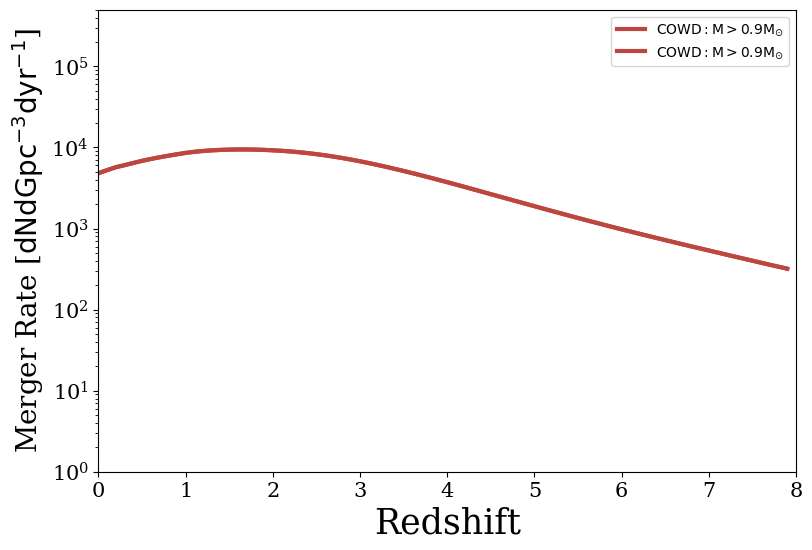

In [37]:
redshifts = rates_info['redshifts']
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],total_merger_rate_WD_SN,linewidth=3,color='#BD4640',label=r'$\mathrm{COWD: M > 0.9 M_{\odot}}$') # all COWD
plt.plot(redshifts[()],cowd_sn_rate_general,linewidth=3,color='#BD4640',label=r'$\mathrm{COWD: M > 0.9 M_{\odot}}$') # all COWD

## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

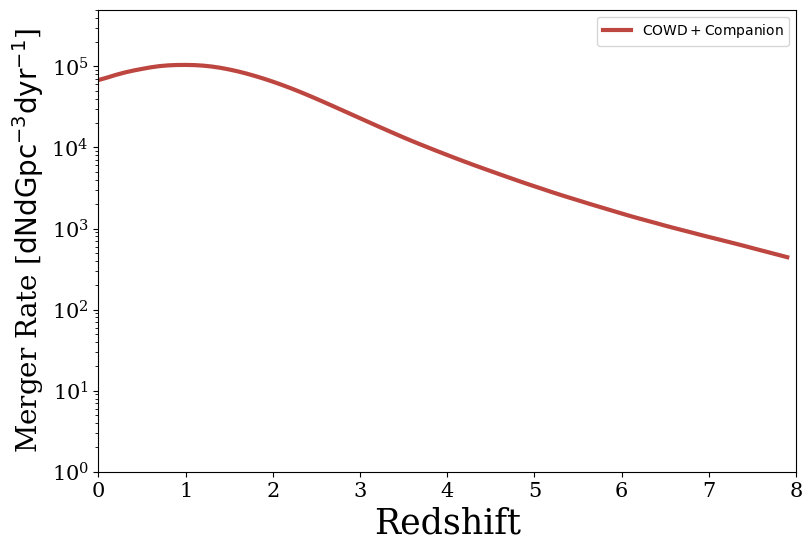

In [38]:
redshifts = rates_info['redshifts']
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],total_merger_rate_COWD,linewidth=3,color='#BD4640',label=r'$\mathrm{COWD + Companion}$') # all COWD
## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

In [ ]:
# redshifts = rates_info['redshifts']
# plt.figure(figsize=(9,6))
# plt.plot(redshifts[()],total_merger_rate_WD_SMALL,linewidth=3,color='#BD4640',label=r'$\mathrm{COWD + Companion}$') # all COWD
# ## axis
# plt.xlim(0,8)
# plt.ylim(10**0,5*10**5)
# plt.yscale('log')
# plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
# plt.xlabel(r"Redshift",fontsize=25)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# # plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
# plt.legend()

In [35]:
# what are the stellar types in this system
print(np.unique(DCO_COWD_SN['Stellar_Type(1)']))
print(np.unique(DCO_COWD_SN['Stellar_Type(2)']))

[ 7 11 12]
[ 0  7  8  9 10 11]


Let's now look at the rate for different selections for the system. Let's look at COWD with a main sequence M < 0.7 m_sol (0), main sequence M > 0.7 m_sol (1), naked helium main squence (7), naked helium (sub) giant (8), HeWD (10), COWD (11), ONeWD (12) and i am not sure what 9 is

In [36]:
# let's create different dataframes for each of these companion cases

# stellar type == 0
low_mass_ms_bool = np.logical_or(DCO_COWD_SN['Stellar_Type(1)']==0,DCO_COWD_SN['Stellar_Type(2)']==0)
low_mass_ms_DATA = DCO_COWD_SN[low_mass_ms_bool]

# stellar type == 1
high_mass_ms_bool = np.logical_or(DCO_COWD_SN['Stellar_Type(1)']==1,DCO_COWD_SN['Stellar_Type(2)']==1)
high_mass_ms_DATA = DCO_COWD_SN[high_mass_ms_bool]

# stellar type == 7
helium_ms_bool = np.logical_or(DCO_COWD_SN['Stellar_Type(1)']==7,DCO_COWD_SN['Stellar_Type(2)']==7)
helium_ms_DATA = DCO_COWD_SN[helium_ms_bool]

# stellar type == 8
helium_subgiant_bool = np.logical_or(DCO_COWD_SN['Stellar_Type(1)']==8,DCO_COWD_SN['Stellar_Type(2)']==8)
helium_subgiant_DATA = DCO_COWD_SN[helium_subgiant_bool]

# stellar type == 9
helium_subgiant_bool = np.logical_or(DCO_COWD_SN['Stellar_Type(1)']==9,DCO_COWD_SN['Stellar_Type(2)']==9)
helium_subgiant_DATA = DCO_COWD_SN[helium_subgiant_bool]

# stellar type == 10
hewd_bool = np.logical_or(DCO_COWD_SN['Stellar_Type(1)']==10,DCO_COWD_SN['Stellar_Type(2)']==10)
hewd_DATA = DCO_COWD_SN[hewd_bool]

# stellar type == 11
cowd_bool = np.logical_and(DCO_COWD_SN['Stellar_Type(1)']==11,DCO_COWD_SN['Stellar_Type(2)']==11)
cowd_DATA = DCO_COWD_SN[cowd_bool]

# stellar type == 12
onewd_bool = np.logical_or(DCO_COWD_SN['Stellar_Type(1)']==12,DCO_COWD_SN['Stellar_Type(2)']==12)
onewd_DATA = DCO_COWD_SN[onewd_bool]


In [37]:
cowd_DATA

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
493,1,1078.118621,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.097638,0.710329,1,0.000465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,1,7817.949768,0.0,0,"b""b'2 '""","b""b'5-8 '""",0.480298,1.129562,1,0.000316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
518,1,1918.564903,0.0,0,"b""b'2-8 '""","b""b'4 '""",0.943178,0.673086,1,0.000232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,2,5345.530020,0.0,0,"b""b'5 '""","b""b'5-8 '""",1.104234,0.679025,1,0.000981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545,2,206.734814,0.0,0,"b""b'5-8 '""","b""b'4-8 '""",1.326412,0.418950,1,0.002358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21677,1,623.438167,0.0,0,"b""b'2-8 '""","b""b'3-8 '""",1.102845,0.650778,1,0.000612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21678,1,4076.846983,0.0,0,"b""b'2-8 '""","b""b'3 '""",1.250117,0.703484,1,0.024066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21680,1,1056.787184,0.0,0,"b""b'2-8 '""","b""b'3-8 '""",1.042414,0.610693,1,0.006919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21683,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
DCO_COWD_SN

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
486,1,0.012639,0.0,1,"b""b'1-2-8 '""","b""b'4 '""",1.265091,6.411682,1,0.002127,...,5.957695,5.758925,5.571568,5.386489,5.19902,5.024496,4.850949,4.680289,4.514279,4.354267
493,1,1078.118621,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.097638,0.710329,1,0.000465,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
508,1,7817.949768,0.0,0,"b""b'2 '""","b""b'5-8 '""",0.480298,1.129562,1,0.000316,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
518,1,1918.564903,0.0,0,"b""b'2-8 '""","b""b'4 '""",0.943178,0.673086,1,0.000232,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
523,2,5345.530020,0.0,0,"b""b'5 '""","b""b'5-8 '""",1.104234,0.679025,1,0.000981,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21677,1,623.438167,0.0,0,"b""b'2-8 '""","b""b'3-8 '""",1.102845,0.650778,1,0.000612,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
21678,1,4076.846983,0.0,0,"b""b'2-8 '""","b""b'3 '""",1.250117,0.703484,1,0.024066,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
21680,1,1056.787184,0.0,0,"b""b'2-8 '""","b""b'3-8 '""",1.042414,0.610693,1,0.006919,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
21683,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


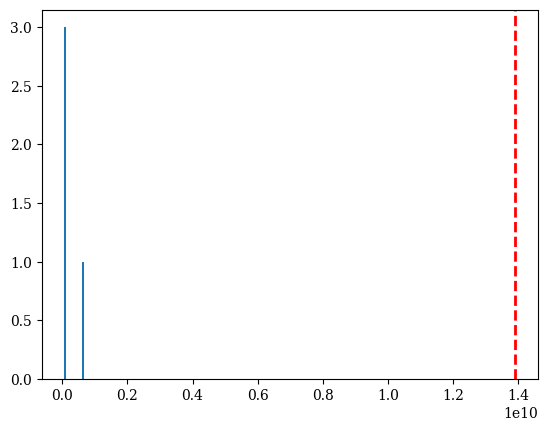

In [39]:
plt.hist(low_mass_ms_DATA['Time']*1e6)
plt.axvline(13.9e9, color='r', linestyle='--', linewidth=2,label='Hubble Time')

In [40]:
low_mass_ms_DATA

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
934,1,1.862077e-09,0.0,0,"b""b'5-8 '""","b""b'NA '""",1.208983,0.185769,1,0.001953,...,8.973578,8.456613,7.981221,7.520616,7.093372,6.679872,6.296860,5.929397,5.583360,5.260094
3334,2,8.586815e+02,0.0,1,"b""b'5-8 '""","b""b'0 '""",1.176640,0.574218,1,0.001631,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3366,1,3.906751e-04,0.0,0,"b""b'5-8 '""","b""b'NA '""",0.928053,0.210299,1,0.001684,...,5.237358,5.022155,4.815474,4.610678,4.415932,4.221902,4.039178,3.860246,3.686659,3.518424
15087,1,2.587046e+00,0.0,0,"b""b'5-8 '""","b""b'NA '""",1.059658,0.536395,1,0.002865,...,3.142454,2.889996,2.659219,2.444893,2.249232,2.071906,1.908257,1.758528,1.619301,1.492981


In [41]:
np.unique(low_mass_ms_DATA['Stellar_Type(2)'])
sum(low_mass_ms_DATA['Immediate_RLOF>CE'])

1

In [42]:
# gettign the mean merger rate per system for stellar type = 0
merger_rate_0 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    rate_0 = np.sum(low_mass_ms_DATA[low_mass_ms_DATA.columns[20+s]])
    merger_rate_0.append(rate_0)


# gettign the mean merger rate per system for stellar type = 1
merger_rate_1 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    rate_1 = np.sum(high_mass_ms_DATA[high_mass_ms_DATA.columns[20+s]])
    merger_rate_1.append(rate_1)


# gettign the mean merger rate per system for stellar type = 7
merger_rate_7 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    rate_7 = np.sum(helium_ms_DATA[helium_ms_DATA.columns[20+s]])
    merger_rate_7.append(rate_7)


# gettign the mean merger rate per system for stellar type = 8
merger_rate_8 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    rate_8 = np.sum(helium_subgiant_DATA[helium_subgiant_DATA.columns[20+s]])
    merger_rate_8.append(rate_8)


# gettign the mean merger rate per system for stellar type = 10
merger_rate_10 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    rate_10 = np.sum(hewd_DATA[hewd_DATA.columns[20+s]])
    merger_rate_10.append(rate_10)



# gettign the mean merger rate per system for stellar type = 11
merger_rate_11 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    rate_11 = np.sum(cowd_DATA[cowd_DATA.columns[20+s]])
    merger_rate_11.append(rate_11)



# gettign the mean merger rate per system for stellar type = 12
merger_rate_12 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    rate_12 = np.sum(onewd_DATA[onewd_DATA.columns[20+s]])
    merger_rate_12.append(rate_12)

In [43]:
test_sum = np.array(merger_rate_7)+np.array(merger_rate_8)
print(len(test_sum))
print(len(merger_rate_7))

80
80


In [44]:
# checking the length of the CE bool for the He Main Sequence
print(sum(helium_ms_DATA['Immediate_RLOF>CE']==True))
print(len(helium_ms_DATA))


420
420


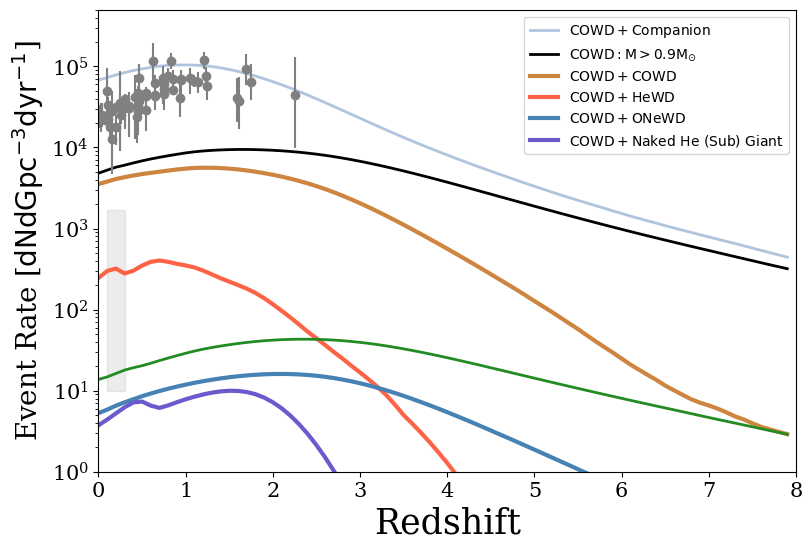

In [52]:
# disitninuish things merging before CE or after CE or due to GW

redshifts = rates_info['redshifts']
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],total_merger_rate_COWD,linewidth=2,color='lightsteelblue',label=r'$\mathrm{COWD + Companion}$') # all COWD
plt.plot(redshifts[()],total_merger_rate_WD_SN,linewidth=2,color='black',label=r'$\mathrm{COWD: M > 0.9 M_{\odot}}$')

# sum of rates = 
#rates_sum = np.array(merger_rate_0) + np.array(merger_rate_1) + np.array(merger_rate_7) + np.array(merger_rate_8) + np.array(merger_rate_10) + np.array(merger_rate_11) + np.array(merger_rate_12)
#plt.plot(redshifts[()],rates_sum,linewidth=3,color='#BD4640',label=r'Sum of Rates') # stellar type = 12

plt.plot(redshifts[()],merger_rate_11,linewidth=3,color='peru',label=r'$\mathrm{COWD + COWD}$') # stellar type = 11
plt.plot(redshifts[()],merger_rate_10,linewidth=3,color='tomato',label=r'$\mathrm{COWD + HeWD}$') # stellar type = 10
plt.plot(redshifts[()],merger_rate_12,linewidth=3,color='steelblue',label=r'$\mathrm{COWD + ONeWD}$') # stellar type = 12
plt.plot(redshifts[()],merger_rate_8,linewidth=3,color='slateblue',label=r'$\mathrm{COWD + Naked}$ $\mathrm{He}$ $\mathrm{(Sub)}$ $\mathrm{Giant}$') # stellar type = 8

# plt.plot(redshifts[()],merger_rate_0,linewidth=3,color='#93B5C6',label=r'$\mathrm{COWD + Main Sequence}$ $\mathrm{M < 0.7 M_{\odot}}$') # stellar type = 0
# plt.plot(redshifts[()],merger_rate_1,linewidth=3,color='#DDEDAA',label=r'$\mathrm{COWD + Main Sequence}$ $\mathrm{M > 0.7 M_{\odot}}$') # stellar type = 1plt.plot(redshifts[()],merger_rate_7,linewidth=3,color='#F0CF65',label=r'$\mathrm{COWD + Naked}$ $\mathrm{He}$ $\mathrm{Main}$ $\mathrm{Sequence}$') # stellar type = 7

## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = 'gray')#,label='Briel et al. 2020')

# NSNS rate
plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=2,color='forestgreen')#,label=r'$\mathrm{BNS}$')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')

## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

## save figure:
# plt.savefig("redshift_rates_COWD_companion.png",bbox_inches='tight',pad_inches=0.1)

Let's look at the merger rate when the COWD is above 0.9 solar masses but below 1.4 solar masses

In [ ]:
sub_chandra_bool = np.logical_or(np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']<1.4),np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Mass(2)']<1.4))
SUB_CHAN_DATA = DCO_data_masked[sub_chandra_bool]
SUB_CHAN_DATA

In [ ]:
# gettign the mean merger rate per system
total_merger_rate_sub_chan = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate = np.sum(SUB_CHAN_DATA[SUB_CHAN_DATA.columns[20+s]])
    total_merger_rate_sub_chan.append(tota_rate)

In [ ]:
redshifts = rates_info['redshifts']
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],total_merger_rate_sub_chan,linewidth=3,color='#BD4640',label=r'$\mathrm{Sub-Chandrasekhar}$ $\mathrm{Systems}$') # all COWD
## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

In [ ]:
# disitninuish things merging before CE or after CE or due to GW

redshifts = rates_info['redshifts']
plt.figure(figsize=(9,6))

plt.plot(redshifts[()],total_merger_rate_COWD,linewidth=3,color='#DDEDAA',label=r'$\mathrm{COWD + Companion]$') # all COWD + companion

# sum of rates = 
rates_sum = np.array(merger_rate_7) + np.array(merger_rate_8) + np.array(merger_rate_10) + np.array(merger_rate_11) + np.array(merger_rate_12)
plt.plot(redshifts[()],rates_sum,linewidth=3,color='grey',label=r'Sum of Rates') # stellar type = 12

## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = '#849E8A')#,label='Briel et al. 2020')

# NSNS rate
plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')

## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

## save figure:
# plt.savefig("redshifts_rates_COWD_companion.pdf",bbox_inches='tight',pad_inches=0.1)

In [ ]:
# checking the length of the CE bool for the He Main Sequence
print(sum(helium_subgiant_DATA['Immediate_RLOF>CE']==True))
print(len(helium_subgiant_DATA))


Let's look at eh helium white dwarf first with these COWD

In [ ]:
hewd_DATA

In [ ]:
plt.hist(low_mass_ms_DATA['Mass(1)']+low_mass_ms_DATA['Mass(2)'])

In [ ]:
plt.hist(high_mass_ms_DATA['Mass(1)']+high_mass_ms_DATA['Mass(2)'])